<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/new/kmeans_new_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kneed


In [ ]:
!pip install yfinance 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [4]:
sc=StandardScaler()

In [5]:
startdate='1995-01-01'

In [29]:
import yfinance as yf
#df =yf.download('^nsei','2012-01-01')
df['signal']=df['Close'].pct_change(50).dropna()
df['signal_new']=np.where(abs(df['signal'])>(0.02),df['signal'],0)
X = np.array((df['signal_new'])) #  -df['Close'].rolling(window=200).mean()).dropna()
X=sc.fit_transform(X.reshape(-1,1))
from sklearn.cluster import KMeans 
from kneed import DataGenerator, KneeLocator

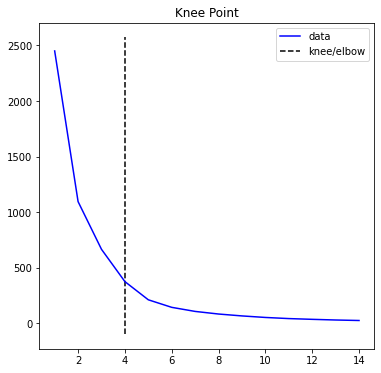

In [30]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
kn = KneeLocator(K, sum_of_squared_distances,S=1.0, curve="convex", direction="decreasing")
kn.plot_knee()
#plt.plot(sum_of_squared_distances)

In [31]:
kn.knee

4

In [32]:
kmeans = KMeans(n_clusters= kn.knee).fit(X.reshape(-1,1))
c = kmeans.predict(X.reshape(-1,1))
minmax = []
for i in range(kn.knee):
    minmax.append([-np.inf,np.inf])
for i in range(len(X)):
    cluster = c[i]
    if X[i] > minmax[cluster][0]:
        minmax[cluster][0] = X[i]
    if X[i] < minmax[cluster][1]:
        minmax[cluster][1] = X[i]

In [ ]:
abcd

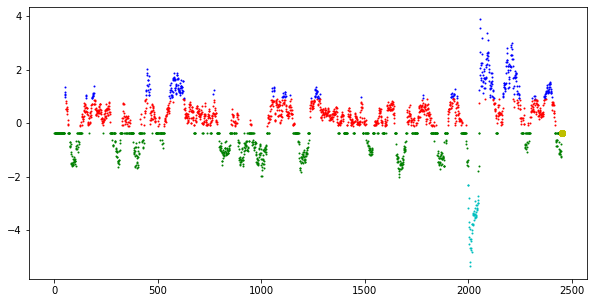

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
for i in range(len(X[:])):
    colors = ['b','g','r','c']
    c = kmeans.predict(X[i].reshape(-1,1))[0]
    color = colors[c]
    plt.scatter(i,X[i],c = color,s = 1)
    plt.scatter(len(X)-1,X[len(X)-1],c='y')

In [ ]:
sc.inverse_transform(X[[-1]])

In [ ]:
'''    
for i in range(len(minmax)):
    plt.hlines(minmax[i][0],xmin = 0,xmax = len(X),colors = 'g')
    plt.hlines(minmax[i][1],xmin = 0,xmax = len(X),colors = 'r')
'''    